In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
parkinson = pd.read_csv('parkinson.csv')

In [3]:
parkinson.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
parkinson.shape

(756, 755)

In [43]:
# there is no null values as the max count of null values is zero..
parkinson.isnull().sum().max()

0

In [5]:
man = parkinson.gender.sum()
total = parkinson.gender.count()
women = total - man
print("Man:"+str(man) + "\nWoman" + str(women))

Man:390
Woman366


In [6]:
#Two columns with similar correlation 
parkinson[["numPulses","numPeriodsPulses"]].corr()

,numPulses,numPeriodsPulses
numPulses,1.000000,0.999917
numPeriodsPulses,0.999917,1.000000


In [7]:
# We can delete on column 
del parkinson['numPeriodsPulses']
parkinson.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


<AxesSubplot:>

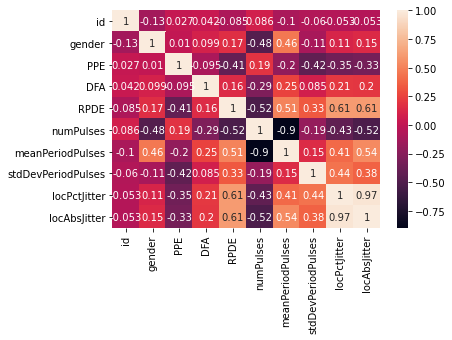

In [8]:
# first 10 columns correalion
sns.heatmap(parkinson[parkinson.columns[0:10]].corr(),annot=True)

In [9]:
#IOC PCT Jitter and IoC ABS Jitter have highly correlated so delete one
del parkinson['locPctJitter']

<AxesSubplot:>

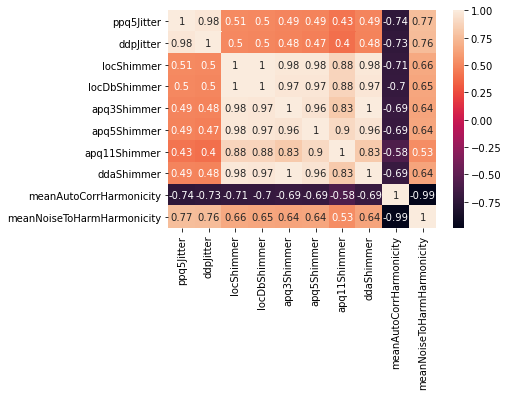

In [10]:
# next 20 correalation 
sns.heatmap(parkinson[parkinson.columns[10:20]].corr(),annot=True)

In [12]:
# delete  columns with same correaltion 
del parkinson['ddpJitter']
del parkinson['locShimmer']
del parkinson['apq11Shimmer']
del parkinson['meanNoiseToHarmHarmonicity']
parkinson.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,0.008064,0.000087,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,0.008258,0.000073,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,0.008340,0.000060,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,0.010858,0.000183,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,0.008162,0.002669,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [13]:
parkinson.shape

(756, 749)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
y=parkinson["class"]
x=parkinson.iloc[:,0:747]
xnew2=SelectKBest(f_classif, k=20).fit_transform(x, y)

In [15]:
X=pd.DataFrame(xnew2)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.4874,0.028115,0.014642,0.019681,0.012829,0.021703,4.8840,-229943.2967,-201985.0408,0.000059,0.005199,0.004324,0.013373,-0.026321,-0.024286,-0.048924,0.022796,0.024286,0.048924,1.5466
1,2.8986,0.022166,0.025500,0.019374,0.010645,0.020296,4.8483,-230526.8175,-203389.4678,0.000169,0.005221,0.004344,0.011184,-0.070039,-0.099695,-0.112210,0.080975,0.099695,0.112210,1.5530
2,3.2208,0.032326,0.024607,0.024819,0.016553,0.023186,1.9849,-246592.6024,-214707.2576,0.000021,0.003136,0.002657,0.008093,-0.019435,-0.026241,-0.039886,0.013810,0.026241,0.039886,1.5399
3,3.1023,0.032577,0.017274,0.016129,0.015533,0.011976,3.2053,-255107.4287,-160775.5650,0.000493,0.004537,0.016104,0.051620,-0.121640,-0.129990,-0.268930,0.111290,0.122970,0.273530,6.9761
4,2.9451,0.031989,0.013791,0.016059,0.014382,0.012686,2.7170,-252647.9964,-154087.6641,0.000328,0.003931,0.015422,0.051298,-0.078138,-0.115900,-0.227210,0.086621,0.102950,0.235860,7.8832


<AxesSubplot:>

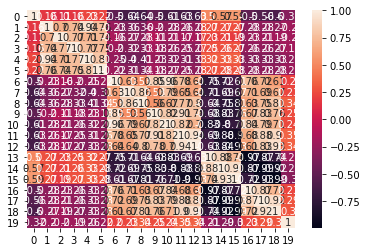

In [16]:
sns.heatmap(X.corr(),annot=True)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43421)
rdclass=RandomForestClassifier()
rdclass.fit(X_train,y_train)
ypred_1=rdclass.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_1))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred_1))

[[ 15  20]
 [  7 110]]
0.8223684210526315


In [31]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
ypred_2=classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_2))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred_2))

[[ 18  17]
 [  8 109]]
0.8355263157894737


In [33]:
# Now tryinng with all features 

In [34]:
park=pd.read_csv("parkinson.csv")
y=park["class"]
x=park.iloc[:,0:746] 


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.29, random_state=43421)
rdclass=RandomForestClassifier()
rdclass.fit(X_train,y_train)
ypred=rdclass.predict(X_test)
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))

[[ 26  25]
 [  6 163]]
0.8590909090909091


In [36]:
from xgboost import XGBClassifier
classifier1 = XGBClassifier()
classifier1.fit(X_train, y_train)
ypred1=classifier1.predict(X_test)
print(confusion_matrix(y_test,ypred1))
print(accuracy_score(y_test,ypred1))

[[ 33  18]
 [  3 166]]
0.9045454545454545


In [ ]:
#THANK YOU ...... 